### Import Module

In [197]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Merge All TAIEX Data

In [198]:
# TAIEX data is download separately based on it month, we have to merge them

# take a look at the first csv files
TAIEX1_df = pd.read_csv("./TAIEX/TAIEX1.csv", header=1, encoding="Big5")
TAIEX1_df.head()

,日期,開盤指數,最高指數,最低指數,收盤指數
0,108/05/02,"10,992.76","11,046.64","10,988.70","11,004.49"
1,108/05/03,"11,037.99","11,097.00","11,018.86","11,096.30"
2,108/05/06,"11,005.36","11,005.36","10,870.40","10,897.12"
3,108/05/07,"10,913.95","11,004.76","10,913.95","10,987.14"
4,108/05/08,"10,938.47","10,946.82","10,867.06","10,923.71"


In [199]:
# take a look at the first csv files
TAIEX2_df = pd.read_csv("./TAIEX/TAIEX2.csv", header=1, encoding="Big5")
TAIEX2_df.head()

,日期,開盤指數,最高指數,最低指數,收盤指數,Unnamed: 5
0,108/06/03,"10,482.45","10,511.20","10,383.51","10,500.07",NaN
1,108/06/04,"10,499.51","10,518.33","10,421.81","10,429.12",NaN
2,108/06/05,"10,497.50","10,541.29","10,446.51","10,461.62",NaN
3,108/06/06,"10,409.90","10,429.33","10,371.08","10,409.20",NaN
4,108/06/10,"10,486.23","10,566.47","10,466.24","10,566.47",NaN


In [200]:
# take a look at the fifth csv files
TAIEX5_df = pd.read_csv("./TAIEX/TAIEX5.csv", header=1, encoding="Big5")
TAIEX5_df.head()

,日期,開盤指數,最高指數,最低指數,收盤指數,Unnamed: 5
0,108/09/02,"10,613.19","10,634.85","10,589.42","10,634.85",NaN
1,108/09/03,"10,629.22","10,650.15","10,557.03","10,558.21",NaN
2,108/09/04,"10,566.32","10,670.43","10,566.32","10,657.31",NaN
3,108/09/05,"10,718.40","10,766.60","10,714.27","10,756.93",NaN
4,108/09/06,"10,783.46","10,803.07","10,753.45","10,780.64",NaN


In [201]:
# we want to merge all 11 csv files into a dataframe
# only the first csv file has 5 columns, others have 6 columns
# we want to remove the last column filled with NaN and merge them

# use the first csv file with 5 columns as base
TAIEX_df = pd.read_csv("./TAIEX/TAIEX1.csv", header=1, encoding="Big5")

for idx in range(2, 12):
    temp_df = pd.read_csv("./TAIEX/TAIEX{}.csv".format(str(idx)), header=1, encoding="Big5")
    TAIEX_df = TAIEX_df.append(temp_df.dropna(axis=1), ignore_index=True)

In [202]:
# take a look at TAIEX_df
TAIEX_df.head()

,日期,開盤指數,最高指數,最低指數,收盤指數
0,108/05/02,"10,992.76","11,046.64","10,988.70","11,004.49"
1,108/05/03,"11,037.99","11,097.00","11,018.86","11,096.30"
2,108/05/06,"11,005.36","11,005.36","10,870.40","10,897.12"
3,108/05/07,"10,913.95","11,004.76","10,913.95","10,987.14"
4,108/05/08,"10,938.47","10,946.82","10,867.06","10,923.71"


In [203]:
# take a look at TAIEX_df
TAIEX_df.tail()

,日期,開盤指數,最高指數,最低指數,收盤指數
219,109/03/25,"9,426.43","9,722.37","9,426.43","9,644.75"
220,109/03/26,"9,667.14","9,739.73","9,565.02","9,736.36"
221,109/03/27,"9,807.90","9,954.86","9,691.14","9,698.92"
222,109/03/30,"9,571.22","9,655.70","9,415.52","9,629.43"
223,109/03/31,"9,689.62","9,789.81","9,630.30","9,708.06"


### Process TAIEX Data

In [204]:
# we only need the date column and the final price of the day
# and set the date as index
TAIEX_df = TAIEX_df.drop(["開盤指數", "最高指數", "最低指數"], axis=1)
TAIEX_df.set_index("日期", inplace=True)
TAIEX_df.index.name = None

In [205]:
# take a look of TAIEX_df
TAIEX_df.head()

,收盤指數
108/05/02,"11,004.49"
108/05/03,"11,096.30"
108/05/06,"10,897.12"
108/05/07,"10,987.14"
108/05/08,"10,923.71"


In [206]:
# chage the type of value to double and calculate percentage change

def Str2Flt(price):
    new_price = ""
    new_price = new_price.join(price.split(','))
    return float(new_price)
    
TAIEX_df["收盤指數"] = TAIEX_df["收盤指數"].apply(Str2Flt)
TAIEX_df = TAIEX_df.pct_change()

In [207]:
# drop NaN row, rename column and multiple 100 
TAIEX_df = TAIEX_df.dropna(axis=0)
TAIEX_df.columns = ["漲跌"]
TAIEX_df["漲跌"] = TAIEX_df["漲跌"].apply(lambda x: x*100)

In [208]:
# take a look at TAIEX_df
TAIEX_df.head()

,漲跌
108/05/03,0.834296
108/05/06,-1.795013
108/05/07,0.826090
108/05/08,-0.577311
108/05/09,-1.739702


### Process ASUS Data

In [209]:
# read asus.csv and look the head of it
ASUS_df = pd.read_csv("asus.csv", encoding="Big5")
ASUS_df.head(10)

,交易,開盤,最高,最低,收盤,漲跌,漲跌.1,振幅,成交資料,Unnamed: 9,...,法人買賣超(張),Unnamed: 13,Unnamed: 14,Unnamed: 15,外資,融資(張),Unnamed: 18,融券(張),Unnamed: 20,券資
0,日期,NaN,NaN,NaN,NaN,NaN,(%),(%),NaN,NaN,...,NaN,NaN,NaN,NaN,持股,NaN,NaN,NaN,NaN,比
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,張數,筆數,...,外資,投信,自營,合計,(%),增減,餘額,增減,餘額,(%)
2,4月7日,199.5,201.0,194.0,196.0,-1.0,-0.51,3.55,"2,664","1,814",...,-599,0,-5,-604,59.4,42,678,0,0,0
3,4月6日,198.5,198.5,192.5,197.0,-1.0,-0.51,3.03,"2,826","2,165",...,"-1,084",2,18,"-1,064",59.5,35,636,0,0,0
4,4月1日,202.0,202.5,198.0,198.0,-6.5,-3.18,2.2,"3,115","2,203",...,"-1,439",1,27,"-1,411",59.6,13,601,-34,0,0
5,3月31日,195.5,204.5,193.0,204.5,11.5,5.96,5.96,"3,863","2,293",...,563,0,-28,535,60,10,588,19,34,5.8
6,3月30日,191.5,194.5,189.0,193.0,1.0,0.52,2.86,"2,619","2,096",...,15,-8,10,17,59.9,84,578,-3,15,2.6
7,3月27日,190.5,195.0,188.0,192.0,6.0,3.23,3.76,"3,925","2,666",...,582,1,-449,134,59.9,15,494,0,18,3.6
8,3月26日,183.0,188.0,182.0,186.0,6.0,3.33,3.33,"3,133","2,353",...,305,2,-32,275,59.8,-75,479,4,18,3.8
9,3月25日,181.0,184.0,180.0,180.0,2.0,1.12,2.25,"4,179","2,664",...,"-1,230",14,-39,"-1,255",59.8,57,554,-4,14,2.5


In [210]:
# to calculate beta value of company, we have to get the the change of stock price in percentage and the date
# stock price chane percentage: 5th column
# date : 0th column
ASUS_df = ASUS_df.iloc[:,[0,6]]

In [211]:
# take a look at new ASUS_df
ASUS_df.head(10)

,交易,漲跌.1
0,日期,(%)
1,NaN,NaN
2,4月7日,-0.51
3,4月6日,-0.51
4,4月1日,-3.18
5,3月31日,5.96
6,3月30日,0.52
7,3月27日,3.23
8,3月26日,3.33
9,3月25日,1.12


In [212]:
# drop the row with NaN value and reset index
ASUS_df = ASUS_df[2:]
ASUS_df = ASUS_df.reset_index(drop=True)
ASUS_df.head()

,交易,漲跌.1
0,4月7日,-0.51
1,4月6日,-0.51
2,4月1日,-3.18
3,3月31日,5.96
4,3月30日,0.52


In [213]:
# format the data to be same as TAIEX above

year = 109
pre_month = None

def FormatDate(date):
    global year
    global pre_month
    
    # extract month and day in the string
    lst = re.findall('\d+', date)
    month = lst[0]
    day = lst[1]
    
    
    # if the month goes from 1(January) to 12(December), then the year decreases
    if(int(month) == 12 and int(pre_month) == 1):
        year -= 1
        
    # edit month and day string to two digits
    if(1<=int(month)<10):
        month = "0" + month
    if(1<=int(day)<10):
        day = "0" + day
    
    pre_month = month
    
    return "{}/{}/{}".format(str(year), month, day)
    

ASUS_df["日期"] = ASUS_df["交易"].apply(FormatDate)

In [214]:
# take a look at new ASUS_df dataframe
ASUS_df

,交易,漲跌.1,日期
0,4月7日,-0.51,109/04/07
1,4月6日,-0.51,109/04/06
2,4月1日,-3.18,109/04/01
3,3月31日,5.96,109/03/31
4,3月30日,0.52,109/03/30
...,...,...,...
237,4月16日,2.37,108/04/16
238,4月15日,0.87,108/04/15
239,4月12日,0.22,108/04/12
240,4月11日,-1.29,108/04/11


In [215]:
# we can drop the first old column and make new column as index
ASUS_df = ASUS_df.drop(["交易"], axis=1)
ASUS_df.set_index("日期", inplace=True)
ASUS_df.index.name = None

In [216]:
# convert each data to float
ASUS_df["漲跌.1"] = ASUS_df["漲跌.1"].apply(lambda x: float(x))

In [217]:
# take a look at new ASUS_df dataframe
ASUS_df

,漲跌.1
109/04/07,-0.51
109/04/06,-0.51
109/04/01,-3.18
109/03/31,5.96
109/03/30,0.52
...,...
108/04/16,2.37
108/04/15,0.87
108/04/12,0.22
108/04/11,-1.29


### Process ACER Data

In [218]:
# because the acer and asus data are downloaded from the same websites
# we just do the same thing on acer.csv

ACER_df = pd.read_csv("acer.csv", encoding="Big5")
ACER_df = ACER_df.iloc[:,[0,6]]
ACER_df = ACER_df[2:]
ACER_df = ACER_df.reset_index(drop=True)

year = 109
pre_month = None
ACER_df["日期"] = ACER_df["交易"].apply(FormatDate)

ACER_df = ACER_df.drop(["交易"], axis=1)
ACER_df.set_index("日期", inplace=True)
ACER_df.index.name = None
ACER_df["漲跌.1"] = ACER_df["漲跌.1"].apply(lambda x: float(x))

In [219]:
# take a look at new ACER_df dataframe
ACER_df

,漲跌.1
109/04/07,-1.58
109/04/06,1.28
109/04/01,0.32
109/03/31,-3.70
109/03/30,9.83
...,...
108/04/16,2.43
108/04/15,0.74
108/04/12,-0.49
108/04/11,-1.20


### Merge ASUS and TAIEX & Find Linear Regression & Statistic Value

In [220]:
# merge TAIEX_df and ASUS_df
TAIEX_ASUS_df = TAIEX_df.merge(ASUS_df, left_index=True, right_index=True, how='inner')

In [221]:
TAIEX_ASUS_df

,漲跌,漲跌.1
108/05/03,0.834296,0.63
108/05/06,-1.795013,-2.71
108/05/07,0.826090,0.00
108/05/08,-0.577311,-1.50
108/05/09,-1.739702,-3.04
...,...,...
109/03/25,3.867593,1.12
109/03/26,0.949843,3.33
109/03/27,-0.384538,3.23
109/03/30,-0.716472,0.52


In [222]:
# convert above data to two numpy array
TAIEX_ASUS_x_array = TAIEX_ASUS_df.iloc[:,0]
TAIEX_ASUS_x_array = TAIEX_ASUS_x_array.to_numpy()

TAIEX_ASUS_y_array = TAIEX_ASUS_df.iloc[:,1]
TAIEX_ASUS_y_array = TAIEX_ASUS_y_array.to_numpy()

# find the linear regression fit the data
TAIEX_ASUS_m, TAIEX_ASUS_b = np.polyfit(TAIEX_ASUS_x_array, TAIEX_ASUS_y_array, 1)

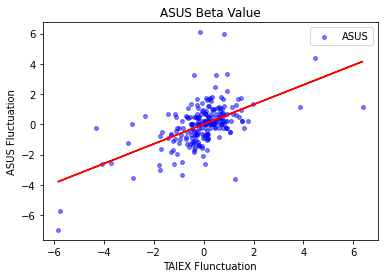

In [223]:
# plot scatter of data
plt.scatter(TAIEX_ASUS_x_array, TAIEX_ASUS_y_array, s=15, c='blue', marker='o', alpha=0.5, label='ASUS')

# plot the linear regression
plt.plot(TAIEX_ASUS_x_array, TAIEX_ASUS_x_array*TAIEX_ASUS_m+TAIEX_ASUS_b, c='red')

# place title and label on axis
plt.title("ASUS Beta Value")
plt.xlabel("TAIEX Flunctuation")
plt.ylabel("ASUS Fluctuation")

# place legend
plt.legend(loc='upper right')

plt.show()

In [224]:
# caluculate p value, r-squared value and beta value (coef)
x_series = TAIEX_ASUS_df["漲跌"]
x_series = sm.add_constant(x_series)
y_series = TAIEX_ASUS_df["漲跌.1"]
model = sm.OLS(y_series, x_series).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   漲跌.1   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     98.56
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.92e-19
Time:                        20:53:09   Log-Likelihood:                -355.82
No. Observations:                 223   AIC:                             715.6
Df Residuals:                     221   BIC:                             722.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.080      0.038      0.9

### Merge ACER and TAIEX & Find Linear Regression & Statistic Value

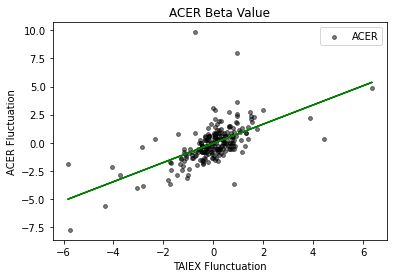

In [225]:
# do the same thing above
TAIEX_ACER_df = TAIEX_df.merge(ACER_df, left_index=True, right_index=True, how='inner')

TAIEX_ACER_x_array = TAIEX_ACER_df.iloc[:,0]
TAIEX_ACER_x_array = TAIEX_ACER_x_array.to_numpy()

TAIEX_ACER_y_array = TAIEX_ACER_df.iloc[:,1]
TAIEX_ACER_y_array = TAIEX_ACER_y_array.to_numpy()

TAIEX_ACER_m, TAIEX_ACER_b = np.polyfit(TAIEX_ACER_x_array, TAIEX_ACER_y_array, 1)

plt.scatter(TAIEX_ACER_x_array, TAIEX_ACER_y_array, s=15, c='black', marker='o', alpha=0.5, label='ACER')
plt.plot(TAIEX_ACER_x_array, TAIEX_ACER_x_array*TAIEX_ACER_m+TAIEX_ACER_b, c='green')
plt.title("ACER Beta Value")
plt.xlabel("TAIEX Flunctuation")
plt.ylabel("ACER Fluctuation")
plt.legend(loc='upper right')

plt.show()

In [226]:
x_series = TAIEX_ACER_df["漲跌"]
x_series = sm.add_constant(x_series)
y_series = TAIEX_ACER_df["漲跌.1"]
model = sm.OLS(y_series, x_series).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   漲跌.1   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     129.9
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           5.65e-24
Time:                        20:53:10   Log-Likelihood:                -385.10
No. Observations:                 223   AIC:                             774.2
Df Residuals:                     221   BIC:                             781.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0549      0.092     -0.599      0.5

### Merge ASUS, ACER and TAIEX & Find Linear Regression & Statistic Value

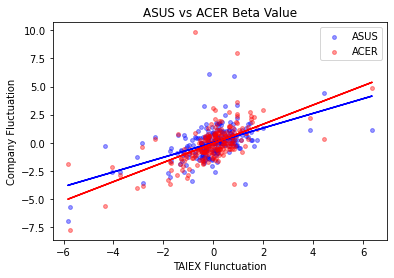

In [228]:
# merge the two plot on into one graph
plt.scatter(TAIEX_ASUS_x_array, TAIEX_ASUS_y_array, s=15, c='blue', marker='o', alpha=0.4, label='ASUS')
plt.plot(TAIEX_ASUS_x_array, TAIEX_ASUS_x_array*TAIEX_ASUS_m+TAIEX_ASUS_b, c='blue')

plt.scatter(TAIEX_ACER_x_array, TAIEX_ACER_y_array, s=15, c='red', marker='o', alpha=0.4, label='ACER')
plt.plot(TAIEX_ACER_x_array, TAIEX_ACER_x_array*TAIEX_ACER_m+TAIEX_ACER_b, c='red')

plt.title("ASUS vs ACER Beta Value")
plt.xlabel("TAIEX Flunctuation")
plt.ylabel("Company Fluctuation")
plt.legend(loc='upper right')
plt.show()